In [1]:
import os
from lib.train_AI_lib import *

In [2]:
os.chdir('..')  # Setting current directory to root of repo
print(os.getcwd())

c:\Users\kevin\Documents\GitHub\APS360-2020Summer-Project


Epoch 0 | Time Taken: 3.52s | Training Error: 47.2894968426, Training loss: 2236.2965116279 | Validation Error: 46.9345745558, Validation loss: 2202.8542887370
Epoch 1 | Time Taken: 2.23s | Training Error: 33.1196450994, Training loss: 1096.9108915107 | Validation Error: 23.6229744502, Validation loss: 558.0449218750
Epoch 2 | Time Taken: 2.22s | Training Error: 21.8611016473, Training loss: 477.9077652332 | Validation Error: 22.8049066317, Validation loss: 520.0637664795
Epoch 3 | Time Taken: 2.21s | Training Error: 21.7076315789, Training loss: 471.2212687648 | Validation Error: 22.5543592707, Validation loss: 508.6991221110
Epoch 4 | Time Taken: 2.25s | Training Error: 21.5888932961, Training loss: 466.0803137491 | Validation Error: 21.9699421935, Validation loss: 482.6783599854
Epoch 5 | Time Taken: 2.14s | Training Error: 21.5104543749, Training loss: 462.6996474155 | Validation Error: 22.5350174419, Validation loss: 507.8270111084
Epoch 6 | Time Taken: 2.16s | Training Error: 21.

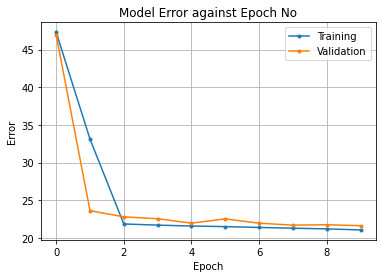

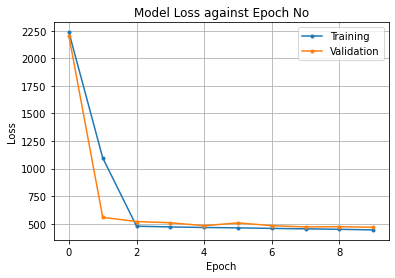

In [4]:
class exNetClass(nn.Module):
    def __init__(self, name):
        super(exNetClass, self).__init__()
        self.name = name

        self.conv1 = nn.Conv2d(3,   4,  4, stride=2)  # n = 1024 -> 510
        self.conv2 = nn.Conv2d(4,  5,  4, stride=2)  # n = 510  -> 255
        self.pool1 = nn.MaxPool2d(3, 2)                # n = 255  -> 127
        self.conv3 = nn.Conv2d(5,  5,  4, stride=2)  # n = 127  -> 62
        self.pool2 = nn.MaxPool2d(4, 2)                # n = 62   -> 30

        self.fc1   = nn.Linear(1*1*5, 10)
        self.fc2   = nn.Linear(10, 1)

    def forward(self, x):
        x = self.pool1(F.relu(self.conv1(x)))
        #print(x.size())
        x = F.relu(self.conv2(x))
        #print(x.size())
        x = self.pool2(F.relu(self.conv3(x)))
        #print(x.size())
        x = x.view(-1, 1*1*5)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return(x)

batchsize=64; lr=0.001; epochNo=10
trainLoader, valLoader, _ = loadData(batchsize, inPath="saved/0.1_resolution", tempPath='temp/default', mode='default', preCalc=0)
net = exNetClass("netA"); net.cuda()
netATrain = trainNet(net, [trainLoader, valLoader], batchsize, epochNo, lr, isCuda=1)